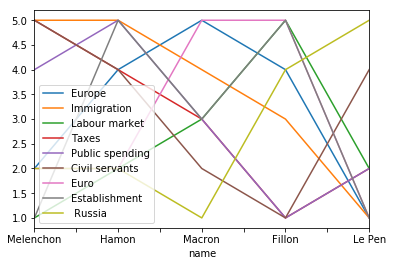

In [570]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('/Users/tillbey/Entwicklung/test/data.csv', index_col=0)
# data = data.iloc[:,0:-1]
data
# plt.errorbar(range(5), data['Europe'].values, [1,2,0.5,1,2], capsize=10, ls='-.')
data.plot()
plt.show()

In [568]:
def make_pca_scatter(data, pos, marker):
#     normData = StandardScaler().fit_transform(data.values)
#     normData = pd.DataFrame(normData, index=data.index, columns=data.columns)
    normData = data
    pca = PCA(n_components=3)
    Y = pca.fit_transform(normData.values)
    Y = pd.DataFrame(Y, index=data.index)
    for candidate, colour in zip(Y.itertuples(), ('red', 'green', 'yellow', 'black', 'brown')):
        plt.scatter(candidate[1], candidate[2], label=candidate.Index, c=colour, marker=marker)
        plt.annotate(candidate.Index, candidate[1:3], [i+10 for i in candidate[1:3]], textcoords='offset pixels')
#         plt.arrow(*candidate[1:3], 1, 1)
    return pca

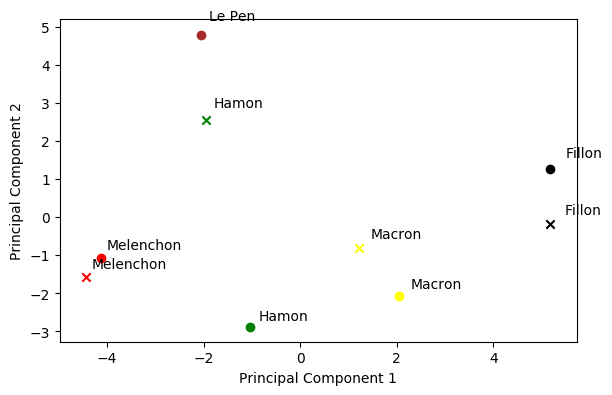

In [569]:
plt.figure(figsize=(6, 4), dpi=100)
pca = make_pca_scatter(data, 0, 'o')
make_pca_scatter(data[data.index != 'Le Pen'], 1, 'x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [557]:
pca.explained_variance_ratio_

array([ 0.58729084,  0.32685949,  0.06609323])

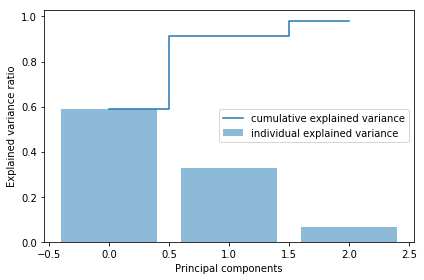

In [558]:
var_exp = list(pca.explained_variance_ratio_)
cum_var_exp = [sum(var_exp[:i+1]) for i, k in enumerate(var_exp)]

plt.figure(figsize=(6, 4))

plt.bar(range(3), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(3), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [559]:
pca.components_

array([[ 0.27870226, -0.12880948,  0.45558434, -0.38091509, -0.32926712,
        -0.45749745,  0.38742391,  0.29199611],
       [-0.47032811, -0.57245471,  0.01515422, -0.32816167, -0.40884236,
         0.03974579, -0.23048106, -0.34830161],
       [-0.0873086 , -0.16252948,  0.09987764, -0.2522315 ,  0.23659335,
         0.13407213, -0.54275969,  0.72375774]])

In [560]:
pca.n_features_

8

In [561]:
X

array([[10,  8, 10],
       [ 8,  8,  8],
       [ 6, 10,  4],
       [ 0,  6,  0],
       [ 6,  0,  6]])